In [1]:
%matplotlib inline
from common.w2v_model import W2VModel
from analysis_tools.cosine_similarity_time_series import cosine_similarity_over_years
from analysis_tools.weat_time_series import compute_weat_over_years
from analysis_tools.semantic_drift import track_semantic_drift
from analysis_tools.average_relatedness_by_year import track_word_semantic_drift

# **Analyze Semantic Change**
## **Goal**: Use trained `Word2vec` emeddings to examine semantic change over time. 

The `hist_w2v` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory.

In [2]:
model_path = '/vast/edk202/NLP_corpora/Google_Books/20200217/eng/5gram_files/6corpus/yearly_files/models_final/norm_and_align/'

### `cosine_similarity` method

Let's say we want to measure the relationship between two pairs of words — _zebra_ and _horse_, and _zebra_ and _bakery_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `cosine_similarity` method for our words.

In [8]:
model = W2VModel(f'{model_path}w2v_y2019_wbnone_vs200_w5_mc20_sg1_e10.kv')

similarity = model.cosine_similarity('zebra', 'horse')
print(f"Cosine similarity = {similarity:.4f}")

similarity = model.cosine_similarity('zebra', 'bakery')
print(f"Cosine similarity = {similarity:.4f}")

Cosine similarity = 0.4250
Cosine similarity = 0.0844


### `cosine_similarity_mean` method

In [5]:
model = W2VModel(f'{model_path}w2v_y2018_wbnone_vs200_w5_mc20_sg1_e10.kv')
reference_model = W2VModel(f'{model_path}w2v_y2019_wbnone_vs200_w5_mc20_sg1_e10.kv')

stability = model.cosine_similarity_mean(reference_model)
print(f"Mean cosine similarity = {stability:.4f}")

Mean cosine similarity = 0.8536


### `track_semantic_drift` function

Using 2018 as anchor model...
⚠️ No models found for these years: [1832]


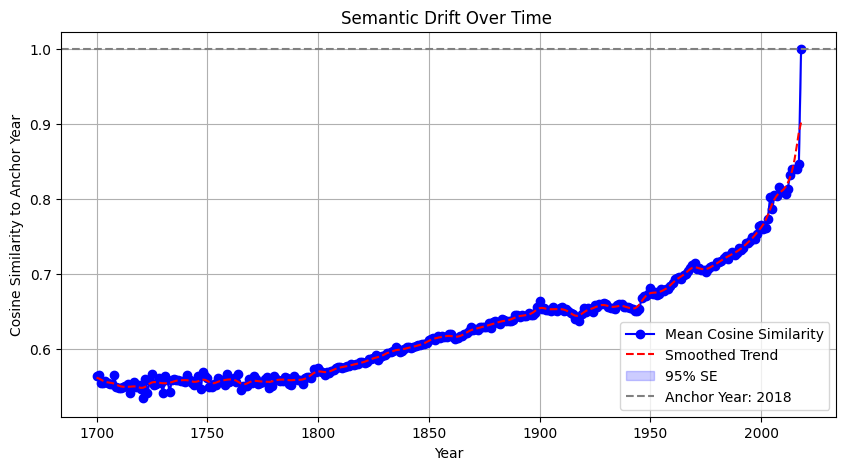

{2018: (1.0, 0.0),
 1700: (0.56399935, 0.0008984815886781631),
 1701: (0.5651436, 0.0012225464113765812),
 1702: (0.554775, 0.0015796598572142234),
 1703: (0.55461264, 0.0015717375085287223),
 1704: (0.5573382, 0.0014480335665589333),
 1705: (0.5536357, 0.0013857560578524504),
 1706: (0.552988, 0.0013654295651024345),
 1707: (0.55247223, 0.001358539549393964),
 1708: (0.5643003, 0.0012269060738727613),
 1709: (0.54824984, 0.0010548129256566143),
 1710: (0.5471621, 0.0014819498965076108),
 1711: (0.54791677, 0.0013215000828792852),
 1712: (0.54853123, 0.0013801300547818154),
 1713: (0.55071896, 0.0013120917141923553),
 1714: (0.5526528, 0.001299809104893352),
 1715: (0.54044425, 0.001269622612664012),
 1716: (0.5512246, 0.001306985975192326),
 1717: (0.5557349, 0.0011030121656534855),
 1718: (0.5487685, 0.0013797093198461665),
 1719: (0.55148023, 0.0013074530003936928),
 1720: (0.54616326, 0.001122214971169947),
 1721: (0.5336074, 0.0010254334755151438),
 1722: (0.5598819, 0.00120060934

In [4]:
track_semantic_drift(
    start_year=1700,
    end_year=2018,
    model_dir=model_path,
    anchor_year=2018,
    plot=True,
    error_type='SE',
    smooth=True,
    sigma=2,
    confidence=0.95
)

Using 2019 as anchor model...
⚠️ No models found for these years: [1832]


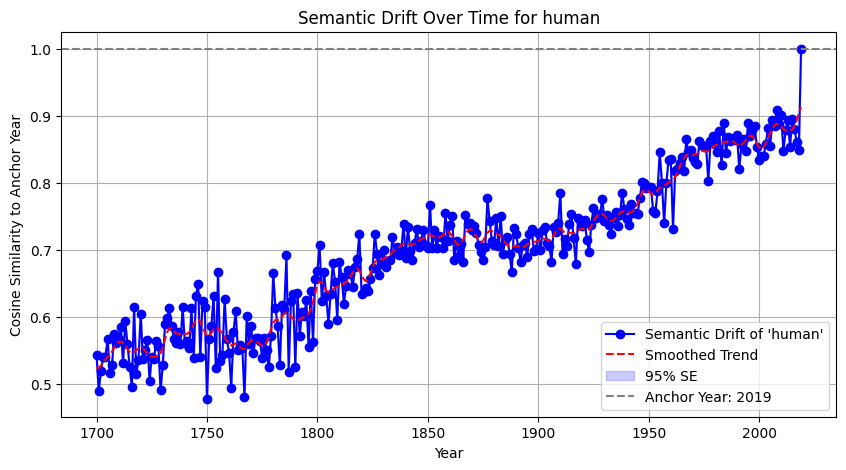

{2019: (1.0, 0.0),
 1700: (0.54441077, 0),
 1701: (0.49041262, 0),
 1702: (0.5204939, 0),
 1703: (0.5408788, 0),
 1704: (0.54040015, 0),
 1705: (0.56780875, 0),
 1706: (0.5173048, 0),
 1707: (0.5284883, 0),
 1708: (0.5753998, 0),
 1709: (0.56115854, 0),
 1710: (0.56780314, 0),
 1711: (0.5850531, 0),
 1712: (0.53135234, 0),
 1713: (0.5944057, 0),
 1714: (0.5599396, 0),
 1715: (0.526102, 0),
 1716: (0.49642304, 0),
 1717: (0.6153948, 0),
 1718: (0.515562, 0),
 1719: (0.53702813, 0),
 1720: (0.6052288, 0),
 1721: (0.5375486, 0),
 1722: (0.5516966, 0),
 1723: (0.5662624, 0),
 1724: (0.5056724, 0),
 1725: (0.5407896, 0),
 1726: (0.5373958, 0),
 1727: (0.5646965, 0),
 1728: (0.5570298, 0),
 1729: (0.4914186, 0),
 1730: (0.5293902, 0),
 1731: (0.5898017, 0),
 1732: (0.5984477, 0),
 1733: (0.61335474, 0),
 1734: (0.5864527, 0),
 1735: (0.5681017, 0),
 1736: (0.56122386, 0),
 1737: (0.57769567, 0),
 1738: (0.5606924, 0),
 1739: (0.6148162, 0),
 1740: (0.5610964, 0),
 1741: (0.56476754, 0),
 174

In [10]:
track_semantic_drift(
    start_year=1700,
    end_year=2019,
    word='human',
    model_dir=model_path,
    anchor_year=2019,
    plot=True,
    error_type='SE',
    smooth=True,
    sigma=2,
    confidence=0.95
)

### `mean_cosine_similarity_to_all` class

In [14]:
model = W2VModel(f'{model_path}w2v_y2019_wbnone_vs200_w5_mc20_sg1_e10.kv')

mean_sim = model.mean_cosine_similarity_to_all('person')
print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1547


Tracking semantic drift for word: 'person' (Excluding: 0 words)
⚠️ No models found for these years: [1832]


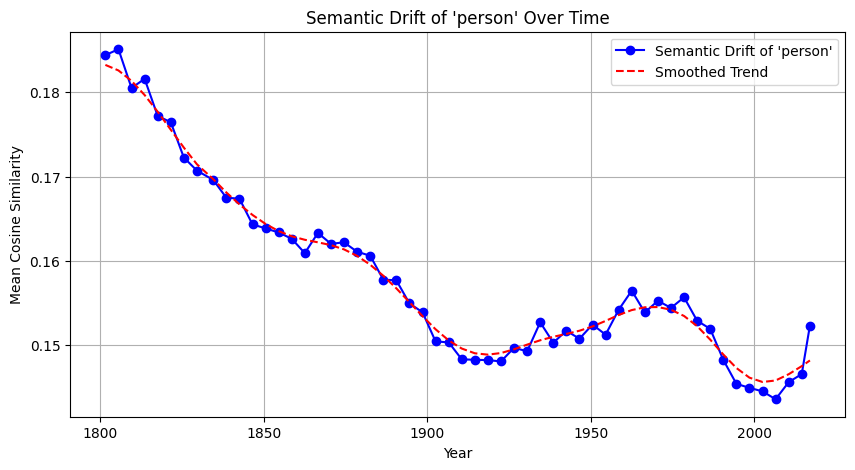

{1800: (0.18220598460045137, 0),
 1801: (0.18706374157482505, 0),
 1802: (0.18375759158986538, 0),
 1803: (0.18452610587701293, 0),
 1804: (0.18469023384954836, 0),
 1805: (0.186115526939119, 0),
 1806: (0.18702718236734128, 0),
 1807: (0.1825194794074326, 0),
 1808: (0.18153108362544193, 0),
 1809: (0.1817678259656314, 0),
 1810: (0.18211585152422258, 0),
 1811: (0.17654644552374418, 0),
 1812: (0.17973027867034044, 0),
 1813: (0.1810743840214455, 0),
 1814: (0.18499591135460927, 0),
 1815: (0.18051199186341266, 0),
 1816: (0.17470861823225609, 0),
 1817: (0.1760171809828018, 0),
 1818: (0.17767557289143593, 0),
 1819: (0.1803029292043517, 0),
 1820: (0.17421469162754916, 0),
 1821: (0.17356232541134792, 0),
 1822: (0.17732419313972367, 0),
 1823: (0.18064309950585583, 0),
 1824: (0.1740215683038627, 0),
 1825: (0.17123086518187597, 0),
 1826: (0.17250729508727752, 0),
 1827: (0.17123567881758608, 0),
 1828: (0.17599583014071274, 0),
 1829: (0.16914702487038621, 0),
 1830: (0.16789581

In [8]:
track_word_semantic_drift(
    word='person',
    start_year=1800,
    end_year=2017,
    model_dir=f'{model_path}',
    plot=4,
    smooth=True,
    sigma=2
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `cosine_similarity` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

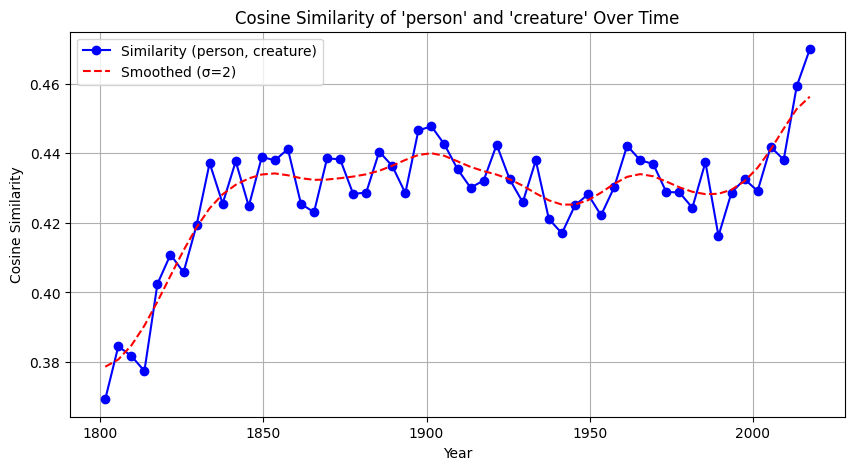

{1800: 0.38251546,
 1801: 0.37099352,
 1802: 0.37125465,
 1803: 0.3524251,
 1804: 0.3664321,
 1805: 0.37972513,
 1806: 0.40950155,
 1807: 0.3823021,
 1808: 0.36730567,
 1809: 0.4234673,
 1810: 0.36626056,
 1811: 0.3699236,
 1812: 0.40506598,
 1813: 0.39255026,
 1814: 0.34257117,
 1815: 0.3694815,
 1816: 0.39970306,
 1817: 0.4050084,
 1818: 0.38144276,
 1819: 0.42364416,
 1820: 0.3689888,
 1821: 0.41425595,
 1822: 0.43316624,
 1823: 0.42711332,
 1824: 0.37882906,
 1825: 0.43540293,
 1826: 0.40333325,
 1827: 0.40556633,
 1828: 0.41978717,
 1829: 0.4110482,
 1830: 0.42572173,
 1831: 0.42085993,
 1833: 0.42013526,
 1834: 0.4528671,
 1835: 0.45532712,
 1836: 0.41006625,
 1837: 0.4298508,
 1838: 0.43532968,
 1839: 0.42692918,
 1840: 0.4301139,
 1841: 0.4722219,
 1842: 0.44428247,
 1843: 0.40414602,
 1844: 0.45271146,
 1845: 0.41573924,
 1846: 0.42434356,
 1847: 0.406268,
 1848: 0.4235667,
 1849: 0.41570523,
 1850: 0.46038547,
 1851: 0.4561722,
 1852: 0.43249485,
 1853: 0.4415455,
 1854: 0.42

In [10]:
cosine_similarity_over_years(
    word1='person',
    word2='creature',
    start_year=1800,
    end_year=2019,
    model_dir=f'{model_path}',
    plot=4,
    smooth=True,
    sigma=2
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [4]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs200_w5_mc20_sg1_e10.kv')

target1 = ["man", "male", "boy", "father", "brother"]
target2 = ["woman", "female", "girl", "mother", "sister"]
attribute1 = ["science", "technology", "chemistry"]
attribute2 = ["art", "literature", "poetry", "painting"]

weat_score, p = model.compute_weat(target1, target2, attribute1, attribute2)
print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

WEAT effect size (Cohen's d) = 0.4909, p = 0.0827


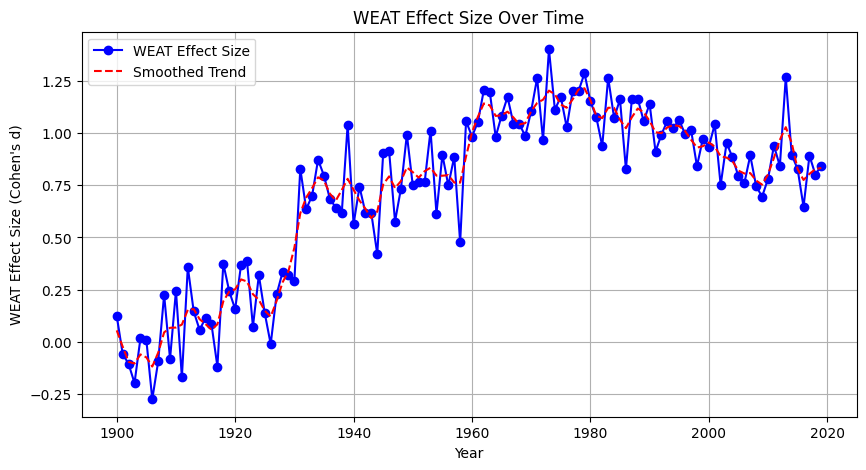

{1900: (0.123597085, None, None),
 1901: (-0.056378685, None, None),
 1902: (-0.105114006, None, None),
 1903: (-0.19635153, None, None),
 1904: (0.017524082, None, None),
 1905: (0.008915252, None, None),
 1906: (-0.27360022, None, None),
 1907: (-0.092086606, None, None),
 1908: (0.22590561, None, None),
 1909: (-0.08115697, None, None),
 1910: (0.24549486, None, None),
 1911: (-0.16913334, None, None),
 1912: (0.35810342, None, None),
 1913: (0.14597617, None, None),
 1914: (0.05734609, None, None),
 1915: (0.116016515, None, None),
 1916: (0.08473425, None, None),
 1917: (-0.11727335, None, None),
 1918: (0.37499073, None, None),
 1919: (0.2423039, None, None),
 1920: (0.1569982, None, None),
 1921: (0.37021136, None, None),
 1922: (0.38682416, None, None),
 1923: (0.073529564, None, None),
 1924: (0.31973833, None, None),
 1925: (0.13767554, None, None),
 1926: (-0.010241651, None, None),
 1927: (0.22714104, None, None),
 1928: (0.33360678, None, None),
 1929: (0.3189211, None, No

In [12]:
target1 = ["socialist", "socialism"]
target2 = ["capitalist", "capitalism"]
attribute1 = ["good", "ideal", "wonderful", "excellent", "great", "fantastic", "amazing", "superb", "outstanding", "marvelous", "splendid", "brilliant", "fabulous", "terrific", "admirable", "commendable", "exemplary", "praiseworthy", "superior", "stellar", "notable", "positive", "advantageous", "desirable"]
attribute2 = ["bad", "evil", "destructive", "terrible", "horrible", "awful", "dreadful", "abysmal", "atrocious", "appalling", "ghastly", "wicked", "villainous", "corrupt", "harmful", "damaging", "deplorable", "noxious", "pernicious", "heinous", "malevolent", "diabolical", "negative", "undesirable"]

compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2019,
    model_dir="/vast/edk202/NLP_corpora/Google_Books/20200217/eng/5gram_files/6corpus/yearly_files/models_final/norm_and_align/",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=1,
    return_std=False
)